## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 182us/step - loss: 2.2592 - accuracy: 0.1583 - val_loss: 2.2020 - val_accuracy: 0.2073
Epoch 2/500
50000/50000 [==============================] - 10s 191us/step - loss: 2.1634 - accuracy: 0.2288 - val_loss: 2.1281 - val_accuracy: 0.2552
Epoch 3/500
50000/50000 [==============================] - 9s 174us/step - loss: 2.1017 - accuracy: 0.2604 - val_loss: 2.0759 - val_accuracy: 0.2789
Epoch 4/500
50000/50000 [==============================] - 8s 168us/step - loss: 2.0559 - accuracy: 0.2815 - val_loss: 2.0350 - val_accuracy: 0.2956
Epoch 5/500
50000/50000 [==============================] - 9s 176us/step - loss: 2.0181 - accuracy: 0.2950 - val_loss: 1.9999 - val_accuracy: 0.3048
Epoch 6/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.9867 - accuracy: 0.3071 - val_loss: 1.9715 - val_accuracy: 0.3206
Epoch 7/500
50000/50000 [==============================

50000/50000 [==============================] - 9s 186us/step - loss: 1.6499 - accuracy: 0.4257 - val_loss: 1.6553 - val_accuracy: 0.4272
Epoch 56/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6469 - accuracy: 0.4263 - val_loss: 1.6549 - val_accuracy: 0.4254
Epoch 57/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.6438 - accuracy: 0.4279 - val_loss: 1.6507 - val_accuracy: 0.4262
Epoch 58/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6406 - accuracy: 0.4282 - val_loss: 1.6486 - val_accuracy: 0.4274
Epoch 59/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.6378 - accuracy: 0.4294 - val_loss: 1.6449 - val_accuracy: 0.4293
Epoch 60/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.6347 - accuracy: 0.4308 - val_loss: 1.6416 - val_accuracy: 0.4289
Epoch 61/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.6318 - accuracy: 0.4317 - val

50000/50000 [==============================] - 9s 173us/step - loss: 1.5214 - accuracy: 0.4711 - val_loss: 1.5488 - val_accuracy: 0.4525
Epoch 110/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.5200 - accuracy: 0.4709 - val_loss: 1.5503 - val_accuracy: 0.4546
Epoch 111/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.5179 - accuracy: 0.4719 - val_loss: 1.5450 - val_accuracy: 0.4560
Epoch 112/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.5162 - accuracy: 0.4724 - val_loss: 1.5489 - val_accuracy: 0.4517
Epoch 113/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.5146 - accuracy: 0.4728 - val_loss: 1.5427 - val_accuracy: 0.4589
Epoch 114/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.5126 - accuracy: 0.4750 - val_loss: 1.5388 - val_accuracy: 0.4559
Epoch 115/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.5108 - accuracy: 0.4746

50000/50000 [==============================] - 9s 179us/step - loss: 1.4337 - accuracy: 0.5005 - val_loss: 1.4838 - val_accuracy: 0.4744
Epoch 164/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.4320 - accuracy: 0.5019 - val_loss: 1.4904 - val_accuracy: 0.4675
Epoch 165/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.4307 - accuracy: 0.5018 - val_loss: 1.4887 - val_accuracy: 0.4697
Epoch 166/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.4293 - accuracy: 0.5015 - val_loss: 1.4829 - val_accuracy: 0.4739
Epoch 167/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.4278 - accuracy: 0.5027 - val_loss: 1.4821 - val_accuracy: 0.4724
Epoch 168/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.4264 - accuracy: 0.5035 - val_loss: 1.4840 - val_accuracy: 0.4760
Epoch 169/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.4251 - accuracy: 0.5033

50000/50000 [==============================] - 9s 184us/step - loss: 1.3570 - accuracy: 0.5267 - val_loss: 1.4356 - val_accuracy: 0.4891
Epoch 218/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.3558 - accuracy: 0.5273 - val_loss: 1.4618 - val_accuracy: 0.4833
Epoch 219/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.3546 - accuracy: 0.5270 - val_loss: 1.4339 - val_accuracy: 0.4908
Epoch 220/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.3533 - accuracy: 0.5273 - val_loss: 1.4328 - val_accuracy: 0.4898
Epoch 221/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.3519 - accuracy: 0.5280 - val_loss: 1.4411 - val_accuracy: 0.4879
Epoch 222/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.3505 - accuracy: 0.5287 - val_loss: 1.4337 - val_accuracy: 0.4933
Epoch 223/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.3494 - accuracy: 0.5283

50000/50000 [==============================] - 9s 174us/step - loss: 1.2885 - accuracy: 0.5496 - val_loss: 1.4008 - val_accuracy: 0.4994
Epoch 272/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2869 - accuracy: 0.5503 - val_loss: 1.4007 - val_accuracy: 0.4996
Epoch 273/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.2854 - accuracy: 0.5511 - val_loss: 1.4080 - val_accuracy: 0.4987
Epoch 274/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.2842 - accuracy: 0.5522 - val_loss: 1.4036 - val_accuracy: 0.5001
Epoch 275/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.2829 - accuracy: 0.5524 - val_loss: 1.3970 - val_accuracy: 0.5046
Epoch 276/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.2815 - accuracy: 0.5521 - val_loss: 1.3963 - val_accuracy: 0.5013
Epoch 277/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.2808 - accuracy: 0.5519

50000/50000 [==============================] - 9s 178us/step - loss: 1.2241 - accuracy: 0.5745 - val_loss: 1.3897 - val_accuracy: 0.5071
Epoch 326/500
50000/50000 [==============================] - 10s 197us/step - loss: 1.2232 - accuracy: 0.5746 - val_loss: 1.3662 - val_accuracy: 0.5147
Epoch 327/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.2219 - accuracy: 0.5752 - val_loss: 1.3717 - val_accuracy: 0.5105
Epoch 328/500
50000/50000 [==============================] - 9s 180us/step - loss: 1.2213 - accuracy: 0.5748 - val_loss: 1.3660 - val_accuracy: 0.5122
Epoch 329/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.2197 - accuracy: 0.5758 - val_loss: 1.3653 - val_accuracy: 0.5147
Epoch 330/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.2190 - accuracy: 0.5759 - val_loss: 1.3815 - val_accuracy: 0.5084
Epoch 331/500
50000/50000 [==============================] - 9s 172us/step - loss: 1.2177 - accuracy: 0.575

50000/50000 [==============================] - 9s 175us/step - loss: 1.1653 - accuracy: 0.5956 - val_loss: 1.3488 - val_accuracy: 0.5205
Epoch 380/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.1644 - accuracy: 0.5950 - val_loss: 1.3631 - val_accuracy: 0.5127
Epoch 381/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.1626 - accuracy: 0.5947 - val_loss: 1.3565 - val_accuracy: 0.5194
Epoch 382/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.1611 - accuracy: 0.5969 - val_loss: 1.3556 - val_accuracy: 0.5147
Epoch 383/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.1599 - accuracy: 0.5958 - val_loss: 1.3521 - val_accuracy: 0.5200
Epoch 384/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.1596 - accuracy: 0.5974 - val_loss: 1.3656 - val_accuracy: 0.5173
Epoch 385/500
50000/50000 [==============================] - 9s 181us/step - loss: 1.1605 - accuracy: 0.5958

50000/50000 [==============================] - 9s 176us/step - loss: 1.1082 - accuracy: 0.6144 - val_loss: 1.3483 - val_accuracy: 0.5222
Epoch 434/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.1079 - accuracy: 0.6126 - val_loss: 1.3377 - val_accuracy: 0.5251
Epoch 435/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.1068 - accuracy: 0.6156 - val_loss: 1.3608 - val_accuracy: 0.5198
Epoch 436/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.1053 - accuracy: 0.6166 - val_loss: 1.3419 - val_accuracy: 0.5239
Epoch 437/500
50000/50000 [==============================] - 9s 178us/step - loss: 1.1037 - accuracy: 0.6157 - val_loss: 1.3602 - val_accuracy: 0.5164
Epoch 438/500
50000/50000 [==============================] - 9s 182us/step - loss: 1.1029 - accuracy: 0.6165 - val_loss: 1.3375 - val_accuracy: 0.5278
Epoch 439/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.1020 - accuracy: 0.6156

50000/50000 [==============================] - 9s 186us/step - loss: 1.0534 - accuracy: 0.6354 - val_loss: 1.3533 - val_accuracy: 0.5206
Epoch 488/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.0542 - accuracy: 0.6340 - val_loss: 1.3509 - val_accuracy: 0.5188
Epoch 489/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.0509 - accuracy: 0.6350 - val_loss: 1.3503 - val_accuracy: 0.5276
Epoch 490/500
50000/50000 [==============================] - 10s 190us/step - loss: 1.0505 - accuracy: 0.6336 - val_loss: 1.3293 - val_accuracy: 0.5299
Epoch 491/500
50000/50000 [==============================] - 9s 176us/step - loss: 1.0494 - accuracy: 0.6355 - val_loss: 1.3742 - val_accuracy: 0.5189
Epoch 492/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.0491 - accuracy: 0.6360 - val_loss: 1.3993 - val_accuracy: 0.5119
Epoch 493/500
50000/50000 [==============================] - 9s 179us/step - loss: 1.0482 - accuracy: 0.635

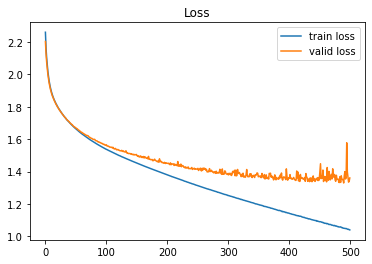

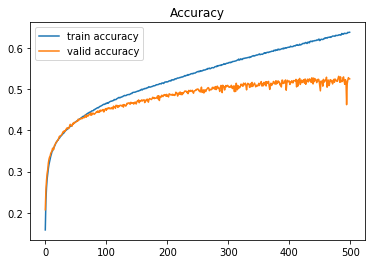

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()